# Pythoch nn.Module
- Pythoch의 신경망 구성을 위한 레이어 혹은 모델을 위한 클래스

In [3]:
from torchviz import make_dot 
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt

In [4]:
class LinearModule(nn.Module):
    def __init__(self, input_dim, output_dim):
        super().__init__()
        self.fc = nn.Linear(input_dim, output_dim)
    
    def forward(self, x):
        return self.fc(x)

model = LinearModule(3, 2)
x = torch.randn(10, 3)
output = model(x)

print(output)

tensor([[ 0.4012,  0.5824],
        [ 0.5829,  0.3784],
        [ 0.7862,  0.3079],
        [-0.6095,  0.5331],
        [ 1.0627, -0.1866],
        [-0.6569,  0.5187],
        [ 0.7571,  1.1424],
        [ 0.1540,  0.4113],
        [ 0.0099,  0.4067],
        [ 0.4478,  0.6302]], grad_fn=<AddmmBackward0>)


### XOR 예측 문제

In [5]:
class XORModel(nn.Module):
    def __init__(self):
        super(XORModel, self).__init__()
        self.layer1 = nn.Linear(2, 2) # 입력 2개, 출력 2개
        self.layer2 = nn.Linear(2, 1) # 입력 2개, 출력 1개
        self.sigmoid = nn.Sigmoid()
    
    def forward(self, x):
        x = self.sigmoid.forward(self.layer1(x))
        x = self.sigmoid.forward(self.layer2(x))
        return x

# 데이터 정의
x_data = torch.tensor([[0, 0], [0, 1], [1, 0], [1, 1]], dtype=torch.float32)
y_data = torch.tensor([[0], [1], [1], [0]], dtype=torch.float32)
model = XORModel()

# 모델 초기화
criterion = nn.BCELoss() # Binary Cross-Entropy loss
optimizer = optim.SGD(model.parameters(), lr=0.1)

max_epoch = 100000
losses = []
for epoch in range(max_epoch + 1):
    # Forward Padd
    outputs = model(x_data)
    loss = criterion(outputs, y_data)
    
    # Backword and optimization
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    
    losses.append(loss.item())
    
    if epoch % 1000 == 0:
        print(f'epoch: {epoch}/{max_epoch}, Loss: {loss.item():.4f}')

/usr/local/lib/python3.11/site-packages/torch/autograd/graph.py:825: UserWarning: CUDA initialization: Unexpected error from cudaGetDeviceCount(). Did you run some cuda functions before calling NumCudaDevices() that might have already set an error? Error 500: named symbol not found (Triggered internally at ../c10/cuda/CUDAFunctions.cpp:108.)
  return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass


epoch: 0/100000, Loss: 0.6992
epoch: 1000/100000, Loss: 0.6912
epoch: 2000/100000, Loss: 0.6774
epoch: 3000/100000, Loss: 0.5938
epoch: 4000/100000, Loss: 0.5169
epoch: 5000/100000, Loss: 0.4466
epoch: 6000/100000, Loss: 0.1972
epoch: 7000/100000, Loss: 0.0797
epoch: 8000/100000, Loss: 0.0465
epoch: 9000/100000, Loss: 0.0323
epoch: 10000/100000, Loss: 0.0246
epoch: 11000/100000, Loss: 0.0198
epoch: 12000/100000, Loss: 0.0165
epoch: 13000/100000, Loss: 0.0141
epoch: 14000/100000, Loss: 0.0124
epoch: 15000/100000, Loss: 0.0110
epoch: 16000/100000, Loss: 0.0099
epoch: 17000/100000, Loss: 0.0090
epoch: 18000/100000, Loss: 0.0082
epoch: 19000/100000, Loss: 0.0075
epoch: 20000/100000, Loss: 0.0070
epoch: 21000/100000, Loss: 0.0065
epoch: 22000/100000, Loss: 0.0061
epoch: 23000/100000, Loss: 0.0057
epoch: 24000/100000, Loss: 0.0054
epoch: 25000/100000, Loss: 0.0051
epoch: 26000/100000, Loss: 0.0049
epoch: 27000/100000, Loss: 0.0046
epoch: 28000/100000, Loss: 0.0044
epoch: 29000/100000, Loss: 

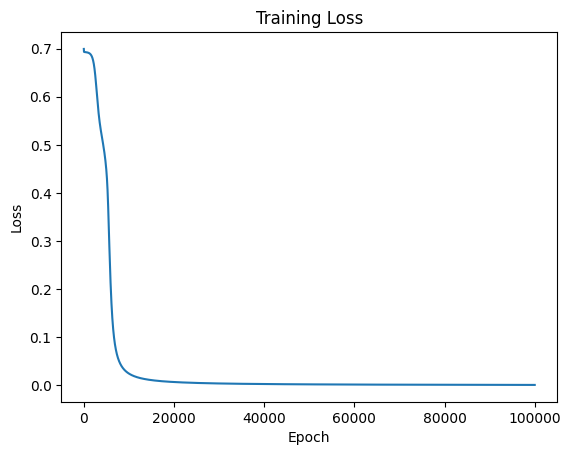

In [6]:
plt.plot(losses)
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training Loss')
plt.show()

In [7]:
with torch.no_grad():
    test = torch.tensor([[0, 0], [0, 1], [1, 0], [1, 1]], dtype=torch.float32)
    predicted = model(test)
    print(predicted)

tensor([[8.6885e-04],
        [9.9890e-01],
        [9.9890e-01],
        [9.2795e-04]])


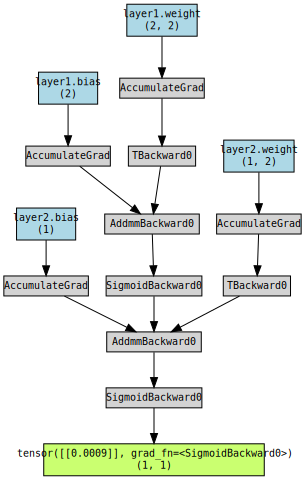

In [8]:
x = torch.randn(1, 2)
y = model(x)
make_dot(y, params={**dict(model.named_parameters()), y:y})